##Download Data

In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 107MB/s] 


##Unzip Data

In [2]:
import zipfile

local_zip = "/content/horse-or-human.zip"
unzip_dir = "./horse-or-humans"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(unzip_dir)

In [3]:
import os

train_horses_dir = os.path.join(unzip_dir,"horses")
train_humans_dir = os.path.join(unzip_dir,"humans")

Ler's print out the images names

In [4]:
train_horses_names = os.listdir(train_horses_dir)
print(train_horses_names[:10])

train_humans_names = os.listdir(train_humans_dir)
print(train_humans_names[:10])

['horse39-2.png', 'horse50-6.png', 'horse15-9.png', 'horse09-9.png', 'horse05-5.png', 'horse26-0.png', 'horse43-1.png', 'horse21-0.png', 'horse06-1.png', 'horse34-9.png']
['human12-29.png', 'human14-30.png', 'human05-10.png', 'human12-14.png', 'human10-20.png', 'human17-28.png', 'human10-28.png', 'human05-01.png', 'human13-17.png', 'human08-04.png']


Let's check the total number of images for each class

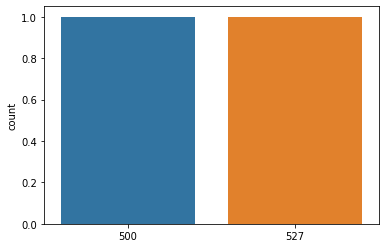

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

horses_count = len(train_horses_names)
humans_count = len(train_humans_names)

sns.countplot(x=[horses_count, humans_count])
plt.show()

Take a look of few

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

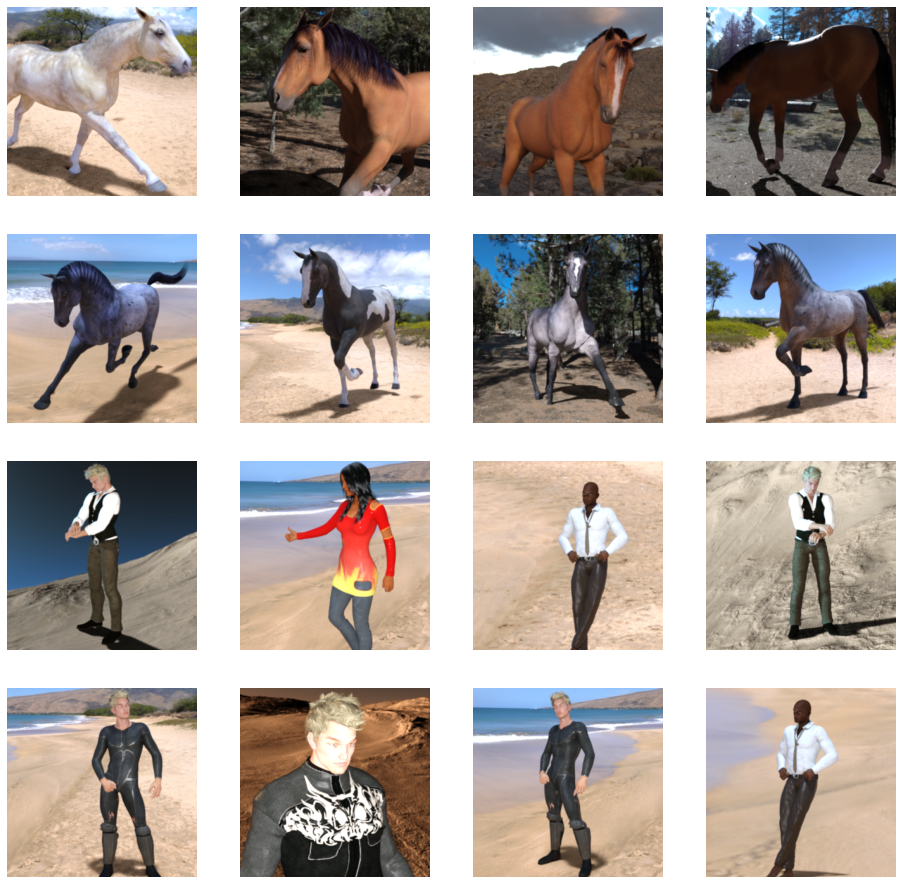

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horses_dir, fname) 
                for fname in train_horses_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname) 
                for fname in train_humans_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Build the model

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
model = Sequential([
  Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), activation = "relu", input_shape = (300,300,3)),
  MaxPooling2D(pool_size = (2,2)), #reduce by 50% the sizes

  Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = "relu"),
  MaxPooling2D(pool_size = (2,2)),

  Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = "relu"),
  MaxPooling2D(pool_size = (2,2)),

  Flatten(),
  Dense(256, activation = "relu"),
  Dense(1, activation = "sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 64)      

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(0.001),loss = "binary_crossentropy",metrics = ["accuracy"])

##Data Preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(rescale= 1/255.)

train_generator = train_datagen.flow_from_directory(
    directory= unzip_dir,
    target_size= (300,300), #pictures will be resized
    color_mode = "rgb",
    batch_size = 64,
    shuffle = True,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.


In [36]:
#total / batch size
steps_per_epoch = 1027//64

model.fit(train_generator, epochs = 10, verbose = 2,steps_per_epoch= steps_per_epoch)

Epoch 1/10
16/16 - 7s - loss: 0.5847 - accuracy: 0.7954 - 7s/epoch - 466ms/step
Epoch 2/10
16/16 - 7s - loss: 0.3081 - accuracy: 0.8910 - 7s/epoch - 454ms/step
Epoch 3/10
16/16 - 7s - loss: 0.3007 - accuracy: 0.8837 - 7s/epoch - 458ms/step
Epoch 4/10
16/16 - 7s - loss: 0.1336 - accuracy: 0.9470 - 7s/epoch - 455ms/step
Epoch 5/10
16/16 - 7s - loss: 0.0292 - accuracy: 0.9886 - 7s/epoch - 452ms/step
Epoch 6/10
16/16 - 7s - loss: 0.1321 - accuracy: 0.9502 - 7s/epoch - 454ms/step
Epoch 7/10
16/16 - 8s - loss: 0.0142 - accuracy: 0.9958 - 8s/epoch - 502ms/step
Epoch 8/10
16/16 - 7s - loss: 5.8996e-04 - accuracy: 1.0000 - 7s/epoch - 452ms/step
Epoch 9/10
16/16 - 7s - loss: 2.1735e-04 - accuracy: 1.0000 - 7s/epoch - 457ms/step
Epoch 10/10
16/16 - 7s - loss: 7.6107e-05 - accuracy: 1.0000 - 7s/epoch - 453ms/step
